# Section 1

In [1]:
import warnings
warnings.filterwarnings("ignore")


## Loading Data

In [2]:
import sklearn.datasets

# Loading the dataset
iris = sklearn.datasets.load_iris()

In [3]:
# Extracting features and labels and ensuring that labels are one-hot encoded

X = iris.data
y = iris.target

print("Shape of data: ",X.shape)
print("Shape of labels: ",y.shape)

# Performing one-hot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray() 
#np.newaxis is used to increase the dimension of the existing array by one more dimension, when used once. Thus, 1D array will become 2D array.
#toarray() is used to convert the sparse matrix to dense matrix
#fit_transform() is used to fit the data and then transform it

print("Shape of labels after one-hot encoding: ",y.shape)
print("Count of each class: ",y.sum(axis = 0))

Shape of data:  (150, 4)
Shape of labels:  (150,)
Shape of labels after one-hot encoding:  (150, 3)
Count of each class:  [50. 50. 50.]


In [4]:
# Train-test split (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalizing the data to [0,1] using standard scaling
from sklearn.preprocessing import MinMaxScaler

print("First 5 rows of training data before scaling: \n",X_train[:5])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MinMaxScaler formula: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#                       X_scaled = X_std * (max - min) + min

print("First 5 rows of training data after scaling: \n",X_train[:5])

First 5 rows of training data before scaling: 
 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
First 5 rows of training data after scaling: 
 [[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]]


## Model training and evaluation

Model:
- Input layer: 4 neurons (for 4 features).
- Hidden layer: 16 neurons, ReLU activation.
- Output layer: 3 neurons (for each class), softmax activation.

Hyperparameters:
- Loss function: Categorical cross-entropy.
- Optimizer: Adam.
- Learning rate: 0.001.
- Batch size: 32.
- Epochs: 50.


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Clear any existing model in memory
keras.backend.clear_session()

# Defining the MLP model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy())

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
print("Finished training")

Epoch 1/50


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.6651 - val_loss: 0.6412
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6638 - val_loss: 0.6354
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6538 - val_loss: 0.6297
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6500 - val_loss: 0.6245
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6459 - val_loss: 0.6194
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6344 - val_loss: 0.6144
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6358 - val_loss: 0.6098
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6320 - val_loss: 0.6052
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6227 - val_loss: 0.6007
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6187 - val_loss: 0.5964
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6143 - val_loss: 0.5923
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6053 - val_loss: 0.5887
Epoch 13/50
4/4

In [12]:
# Evaluating the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("First 5 predictions: \n",y_pred[:5])
print("First 5 actual: \n",y_test[:5])

# Converting the one-hot encoded vectors to a single class
y_pred = np.argmax(y_pred, axis=1)
y_test_n = np.argmax(y_test, axis=1)

accuracy=accuracy_score(y_test_n, y_pred)
precision=precision_score(y_test_n, y_pred, average='weighted')  # average='weighted' is used to calculate the precision for each class and then average it
recall=recall_score(y_test_n, y_pred, average='weighted')
f1=f1_score(y_test_n, y_pred, average='weighted')

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
First 5 predictions: 
 [[0.15126145 0.3687558  0.47998282]
 [0.6048389  0.17051041 0.22465071]
 [0.0377714  0.341314   0.62091464]
 [0.12257667 0.36155602 0.51586735]
 [0.12599005 0.3648565  0.5091535 ]]
First 5 actual: 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
Accuracy:  0.7
Precision:  0.535
Recall:  0.7
F1 Score:  0.5935483870967742


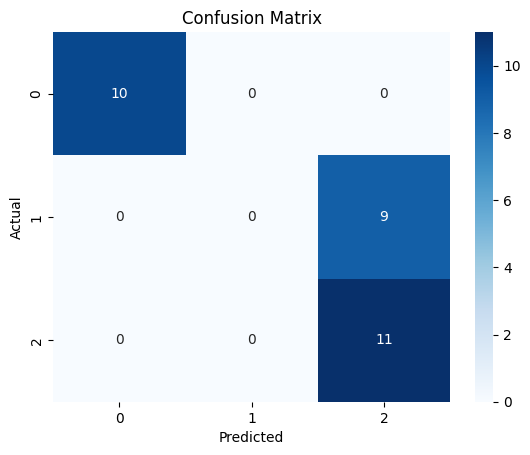

In [13]:
# Heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_n, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

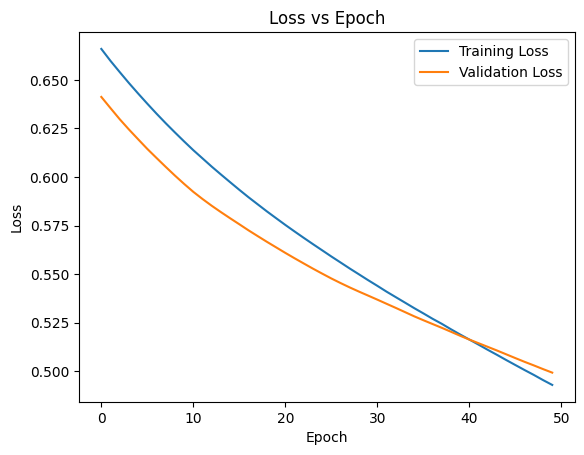

In [14]:
# Plotting the training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.savefig('loss_vs_epoch.png')
plt.show()

## Logging with Weights and Biases

**Logging the following details:**
- Model architecture: Number of layers, neurons, activation functions.
- Hyperparameters: Learning rate, batch size, number of epochs.
- Training and validation loss per epoch.
- Final evaluation metrics.
- Confusion matrix and loss curve visualizations.

In [15]:
# Logging using weights and biases
import wandb

# Take key from API.txt
with open('API.txt', 'r') as file:
    api_key = file.read()
wandb.login(key=api_key)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Praanshu IIT\_netrc
wandb: Currently logged in as: praanshu (praanshu-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [16]:
# Logging the model to weights and biases

# Initialize Weights & Biases
wandb.init(project="Asgn6")

# Log model architecture details
model_config = {
    "num_layers": len(model.layers),
    "layers": [layer.__class__.__name__ for layer in model.layers],
    "neurons": [layer.units if hasattr(layer, 'units') else None for layer in model.layers], 
    "activations": [layer.activation.__name__ for layer in model.layers if hasattr(layer, 'activation')],
}
wandb.config.update(model_config)

# Log hyperparameters
hyperparams = {
    "learning_rate": model.optimizer.learning_rate.numpy(),
    "batch_size": batch_size,
    "epochs": epochs,
}
wandb.config.update(hyperparams)

# Log training and validation loss per epoch
history_data = {"epoch": list(range(1, len(history.history['loss']) + 1)),
                "train_loss": history.history["loss"],
                "val_loss": history.history["val_loss"]}
for epoch, train_loss, val_loss in zip(*history_data.values()):
    wandb.log({"epoch": epoch, "train_loss": train_loss, "val_loss": val_loss})

# Final evaluation metrics
wandb.log({
    "accuracy": float(accuracy),
    "precision": float(precision),
    "recall": float(recall),
    "f1_score": float(f1)
}) 


# Log pre-generated confusion matrix
wandb.log({"confusion_matrix": wandb.Image("confusion_matrix.png")})

# Log pre-generated loss curve
wandb.log({"loss_curve": wandb.Image("loss_vs_epoch.png")})


# Finish logging
wandb.finish()

accuracy,▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
f1_score,▁
precision,▁
recall,▁
train_loss,███▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁
val_loss,██▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
accuracy,0.7
epoch,50
f1_score,0.59355
precision,0.535


### **Screenshots:**

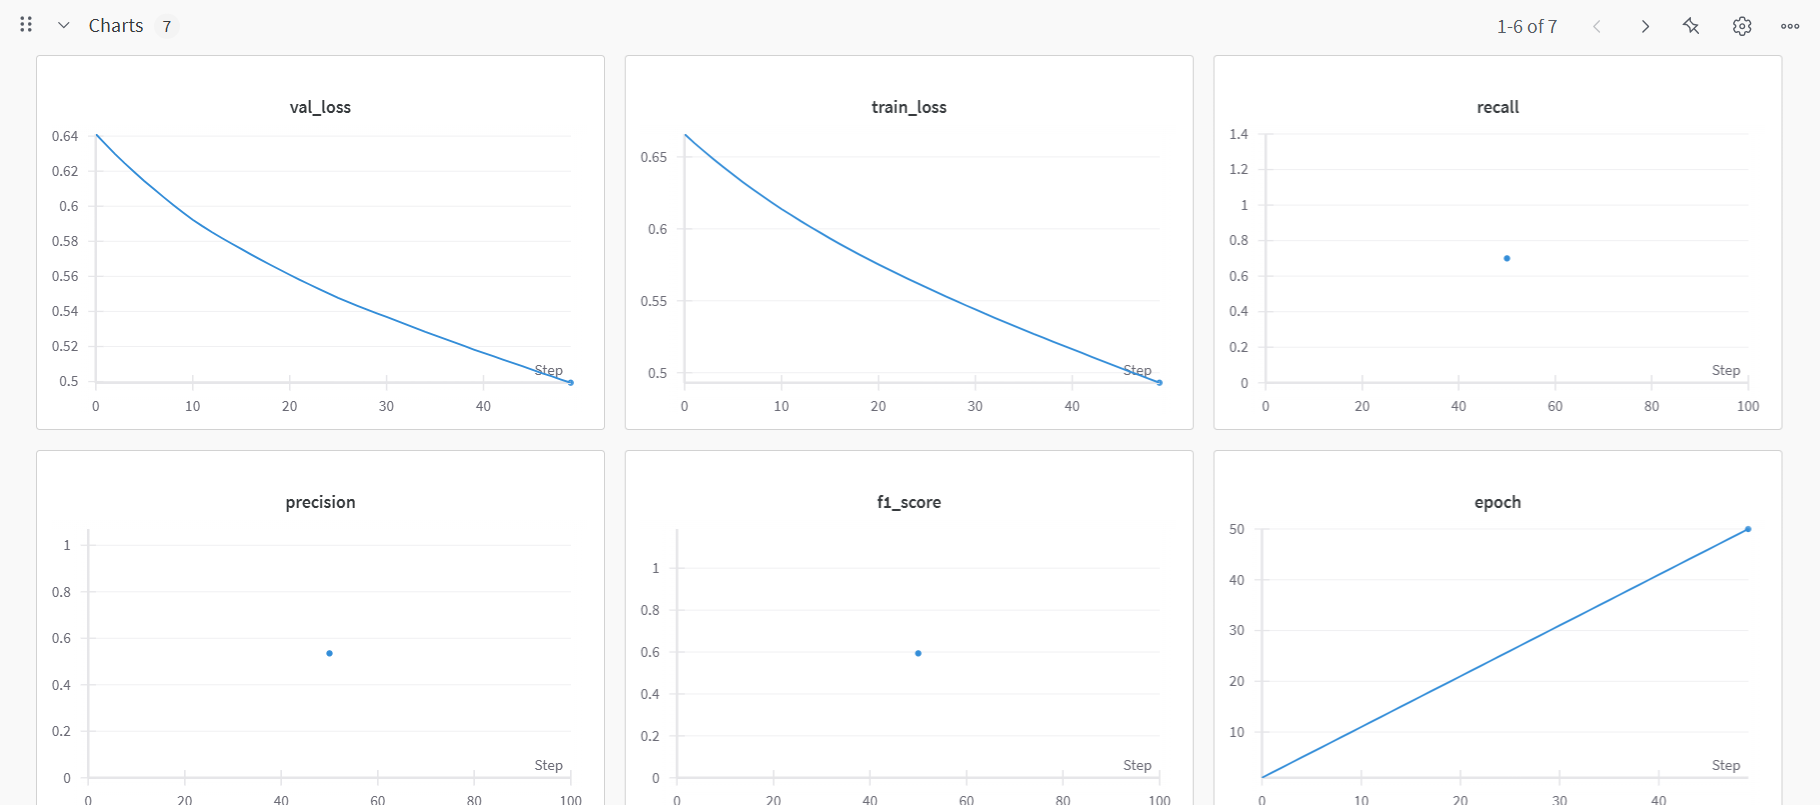

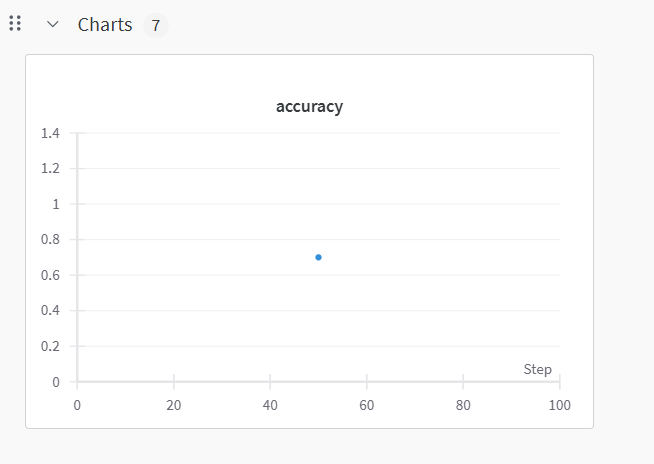

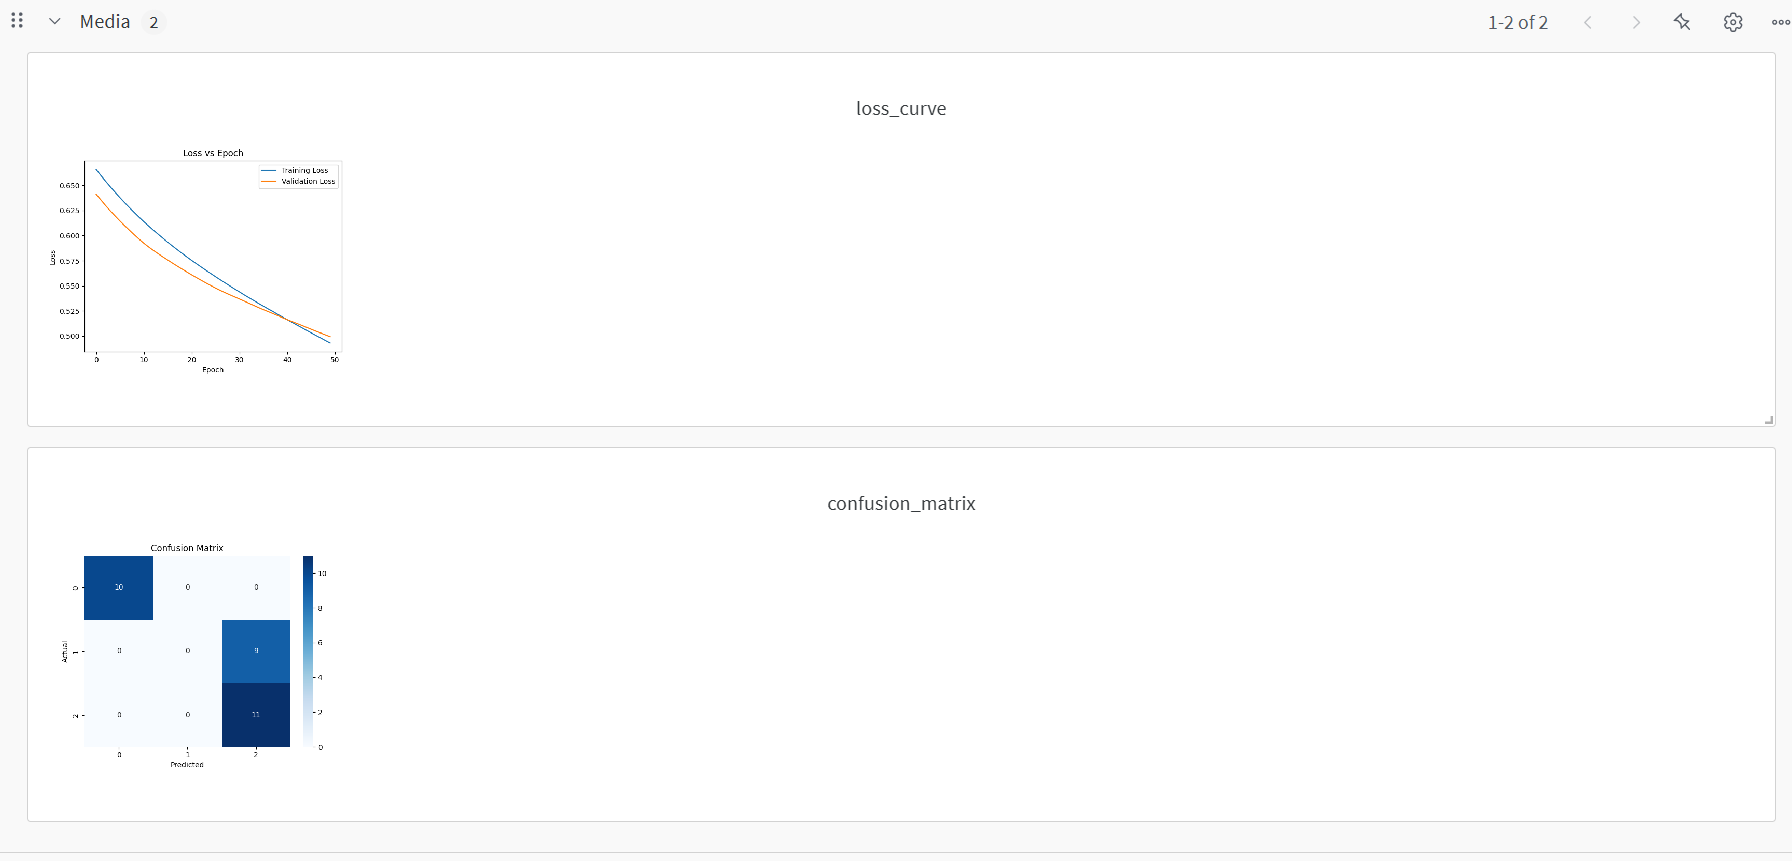

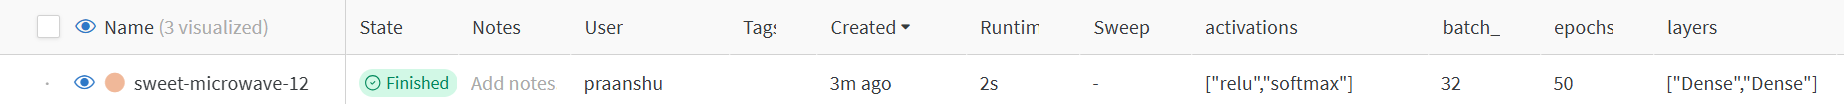

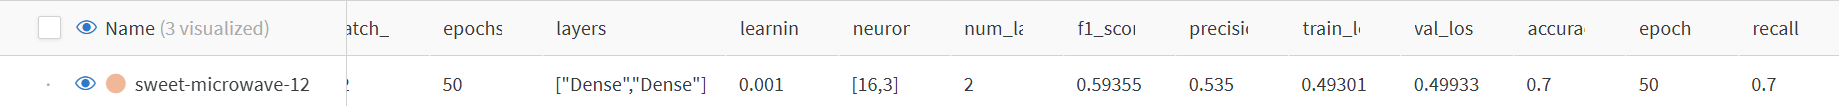

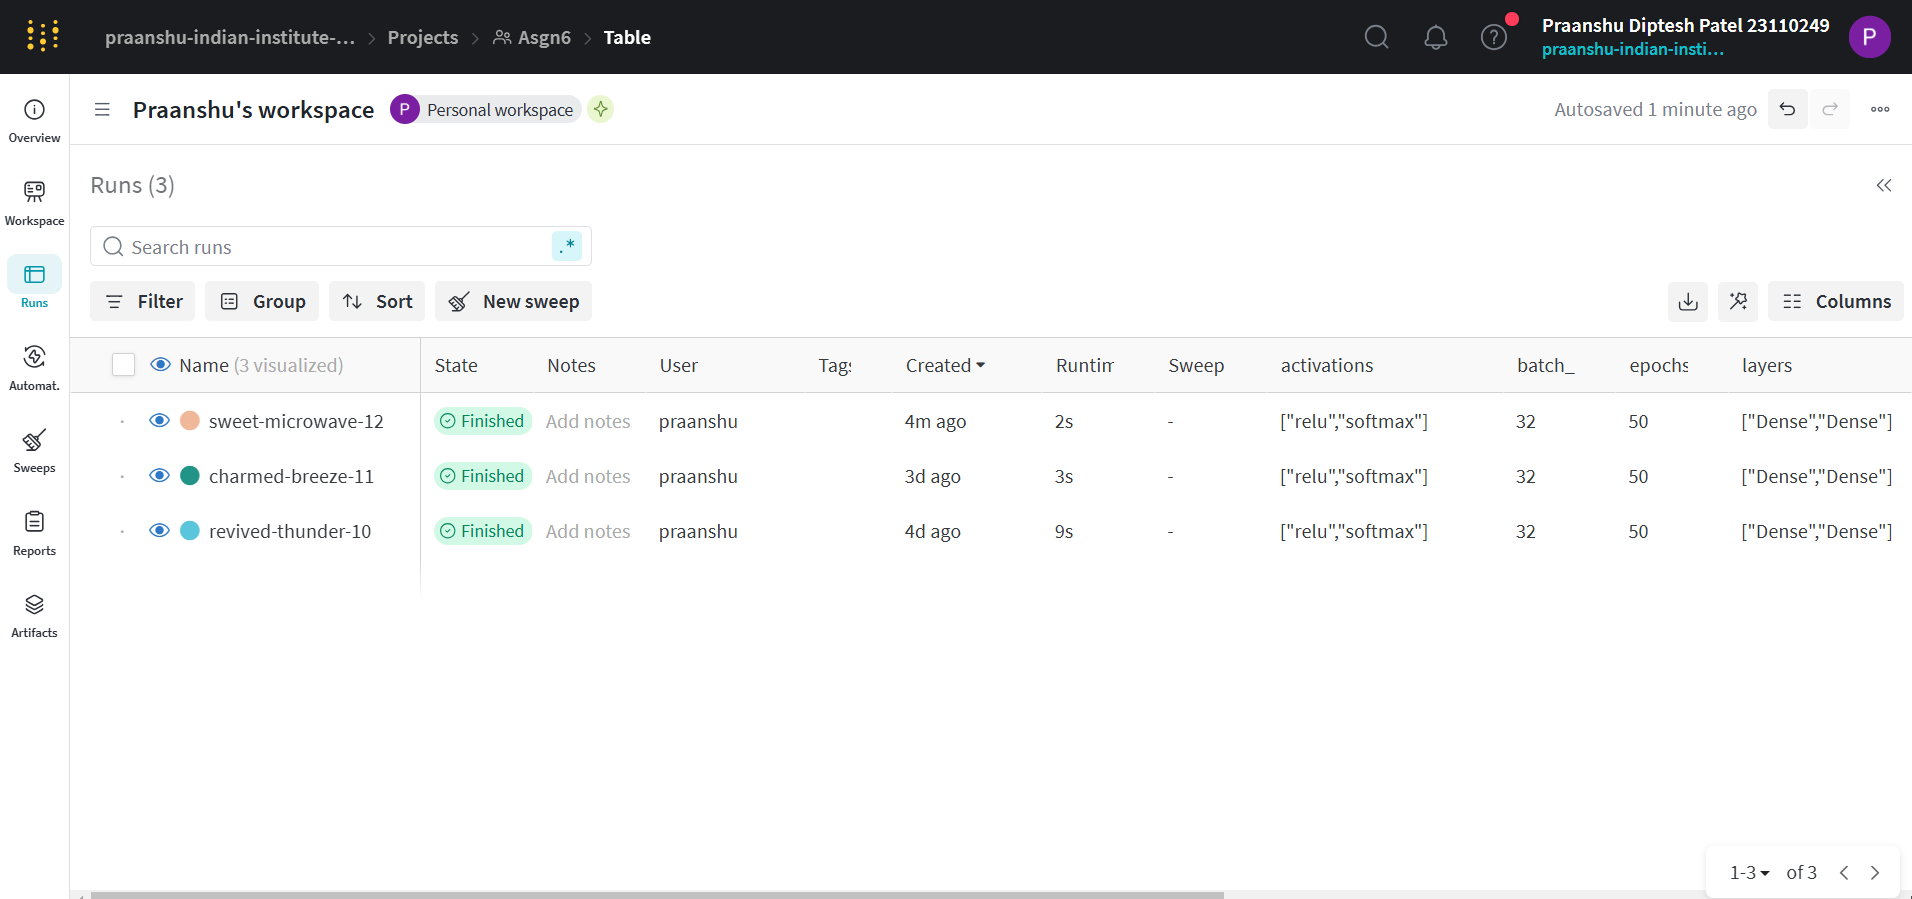

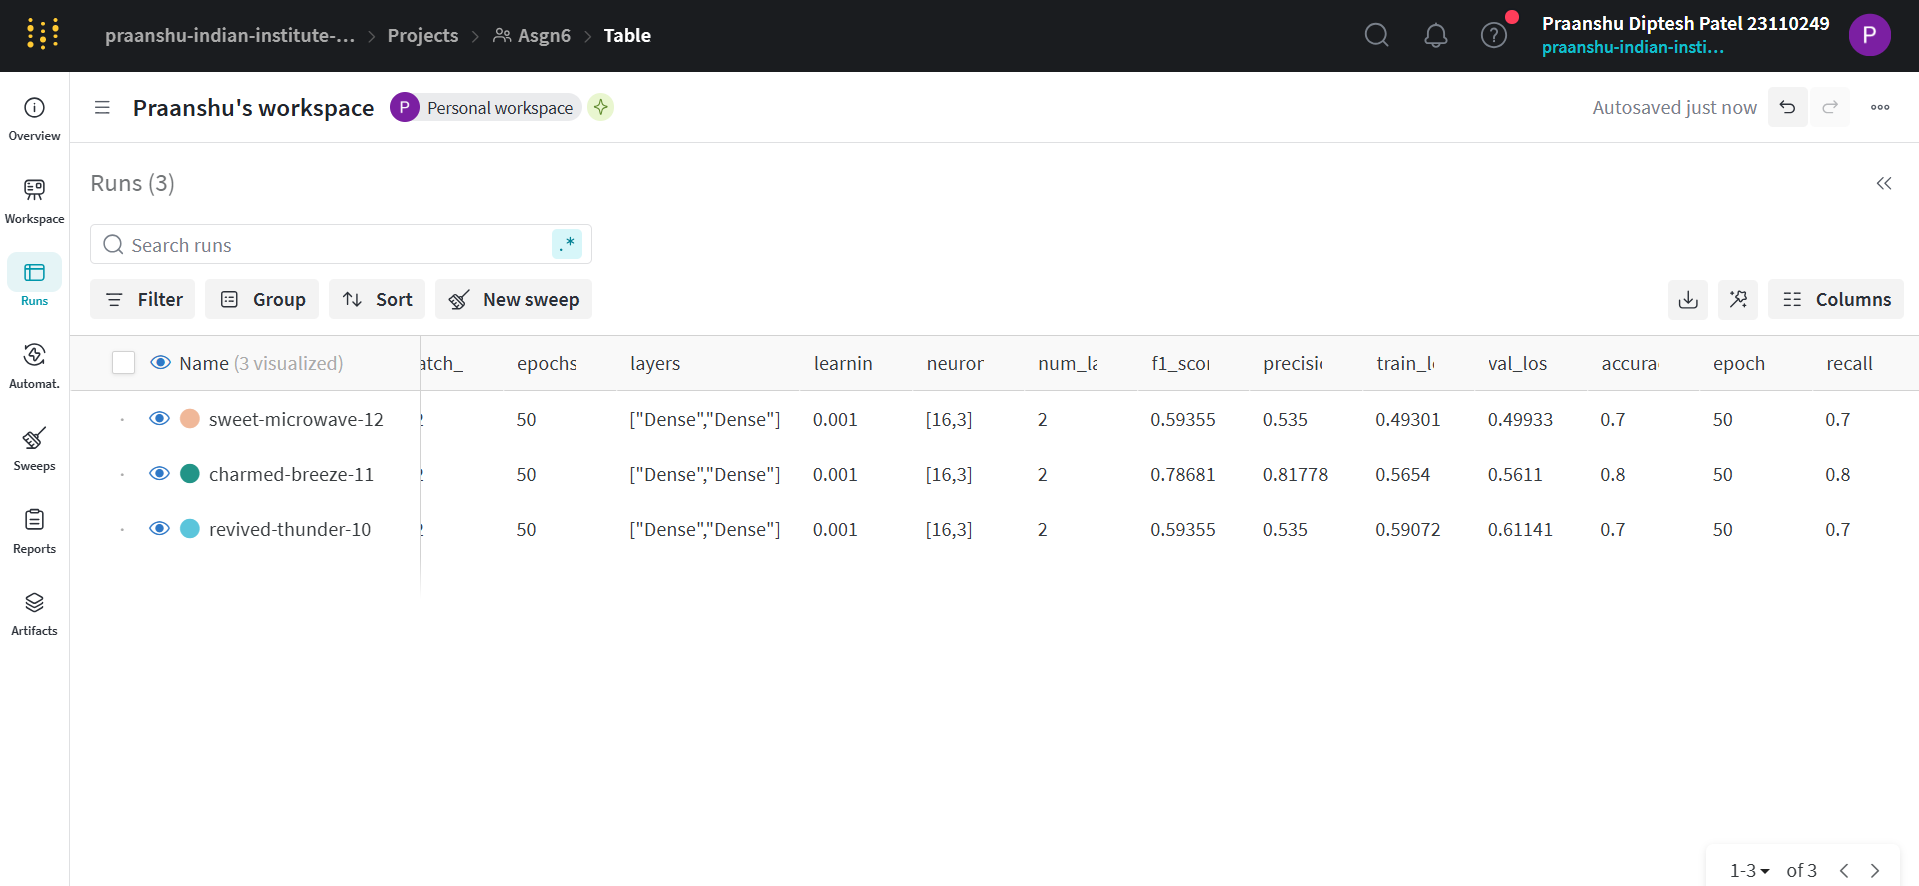

# Task 2


Use the model trained in the previous section.
Train the model on the batch size of [2 & 4], learning rate [1e-3 and 1e-5], and epochs [1, 3, and 5].
Train the model and measure the accuracy and F1 over the test set. Plot the confusion matrix over the test-set predictions.
Plot using the truth labels and predicted labels in matplotlib. 
Show the inputs, prediction, and truth values for five samples from the test set.



In [29]:
# Define parameters for grid search
param = {
    'batch_size': [2, 4],
    'learning_rate': [0.001, 1e-5],
    'epochs': [1, 3, 5]
}

results = []
for batch_size in param['batch_size']:
    for learning_rate in param['learning_rate']:
        for epochs in param['epochs']:
            print(f"\nTraining model with batch_size: {batch_size}, learning_rate: {learning_rate}, epochs: {epochs}")
            keras.backend.clear_session() # Clearing any existing model in memory

            # Defining the MLP model
            model = Sequential()
            model.add(Dense(16, input_dim=4, activation='relu'))
            model.add(Dense(3, activation='softmax'))

            # Compiling the model
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.BinaryCrossentropy())

            # Training the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                              verbose=1, validation_split=0.1)
            
            # Evaluating the model
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)

            # Calculate metrics
            accuracy = accuracy_score(y_test_classes, y_pred_classes)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
            
            # Store results
            results.append({
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'epochs': epochs,
                'accuracy': accuracy,
                'f1': f1
            })

            # Storing the training and validation losses with par
            results[-1]['train_loss'] = history.history['loss']
            results[-1]['val_loss'] = history.history['val_loss']
            
            # store y_pred_classes and y_test_classes for confusion matrix
            results[-1]['y_pred_classes'] = y_pred_classes
            results[-1]['y_test_classes'] = y_test_classes
            

            # Show 5 sample predictions
            print("\nSample predictions:")
            print("Input Features | True Label | Predicted Label")
            print("-" * 50)
            for i in range(5):
                true_label = y_test_classes[i]
                pred_label = y_pred_classes[i]
                features = X_test[i]
                print(f"{features} | {true_label} | {pred_label}")
        
            # Print accuracy and F1 score
            print("For batch_size: {}, learning_rate: {}, epochs: {}".format(batch_size, learning_rate, epochs))
            print(f"\nAccuracy: {accuracy}")
            print(f"F1 Score: {f1}")



Training model with batch_size: 2, learning_rate: 0.001, epochs: 1
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6727 - val_loss: 0.6464
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1
For batch_size: 2, learning_rate: 0.001, epochs: 1

Accuracy: 0.3333333333333333
F1 Score: 0.22619047619047622

Training model with batch_size: 2, learning_rate: 0.001, epochs: 3
Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6828 - val_loss: 0.6226
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6278 - val_loss: 0.5882
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5957 - val_loss: 0.5634
1/1 ━

For batch_size:  2 , learning_rate:  0.001 , epochs:  1
Loss:  [0.665264368057251]
Validation Loss:  [0.6463564038276672]


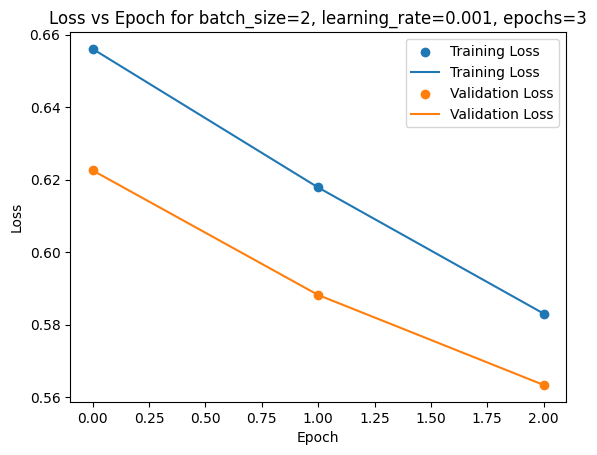

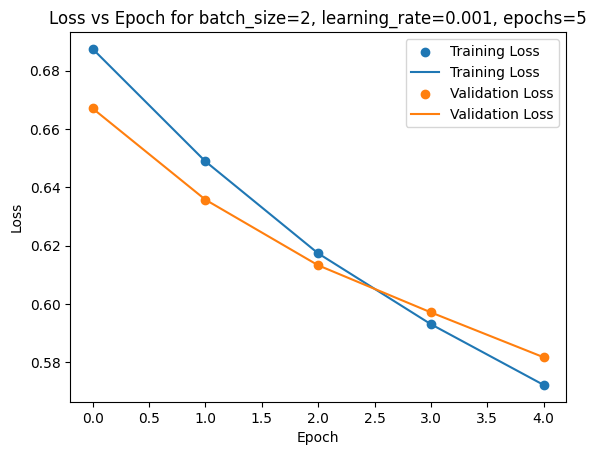

For batch_size:  2 , learning_rate:  1e-05 , epochs:  1
Loss:  [0.7155869007110596]
Validation Loss:  [0.7118396759033203]


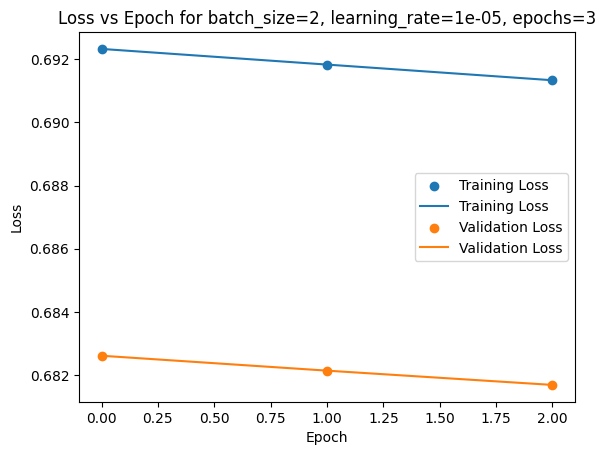

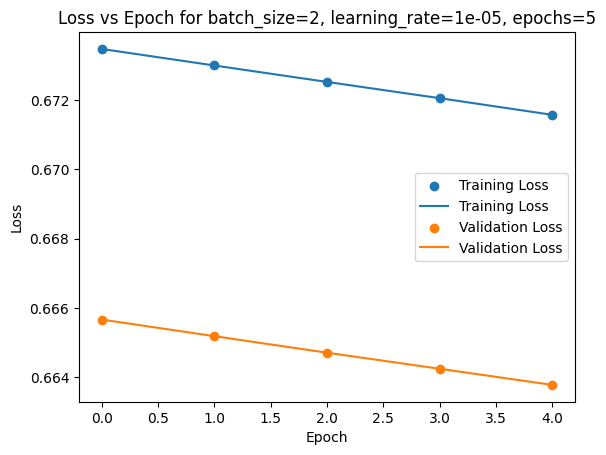

For batch_size:  4 , learning_rate:  0.001 , epochs:  1
Loss:  [0.6601170897483826]
Validation Loss:  [0.6332685351371765]


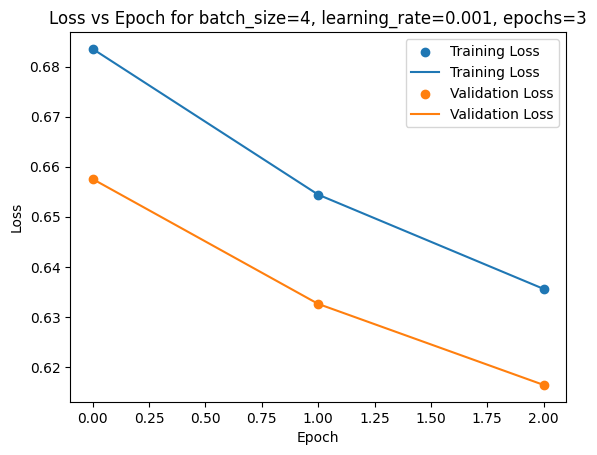

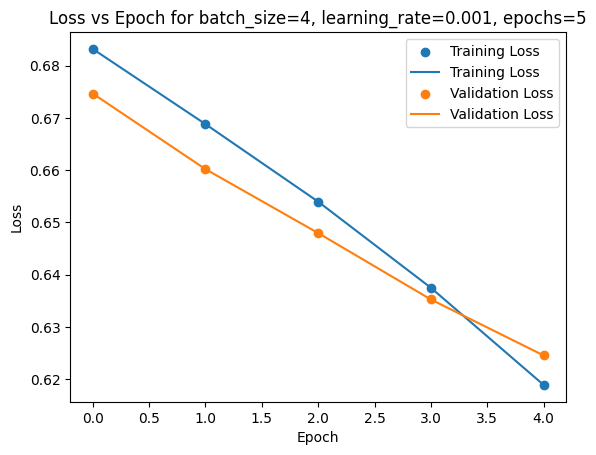

For batch_size:  4 , learning_rate:  1e-05 , epochs:  1
Loss:  [0.7210202813148499]
Validation Loss:  [0.7196189761161804]


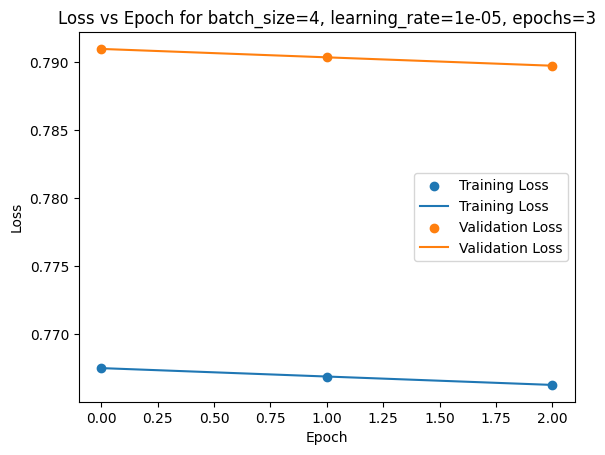

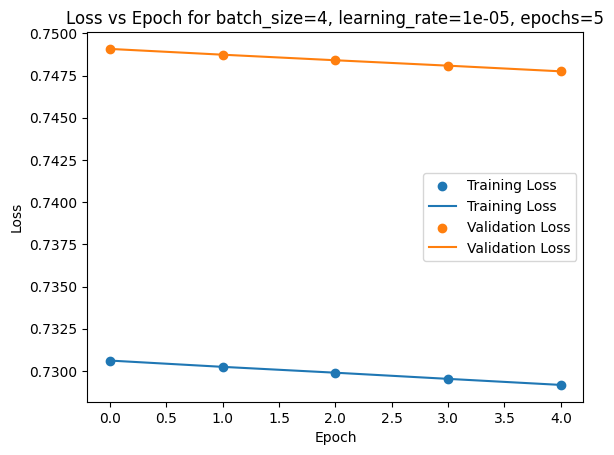

In [30]:
# Plotting seprate the training and validation losses for all hyperparameter combinations
for result in results:
    if result['epochs'] == 1:
        print("For batch_size: ",result['batch_size'],", learning_rate: ",result['learning_rate'],", epochs: ",result['epochs'])
        print("Loss: ",result['train_loss'])
        print("Validation Loss: ",result['val_loss'])
        continue

    plt.scatter(range(result['epochs']), result['train_loss'], label='Training Loss', marker='o')
    plt.plot(result['train_loss'], label='Training Loss')
    plt.scatter(range(result['epochs']), result['val_loss'], label='Validation Loss', marker='o')
    plt.plot(result['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Epoch for batch_size={result["batch_size"]}, learning_rate={result["learning_rate"]}, epochs={result["epochs"]}')
    plt.legend()
    plt.show()

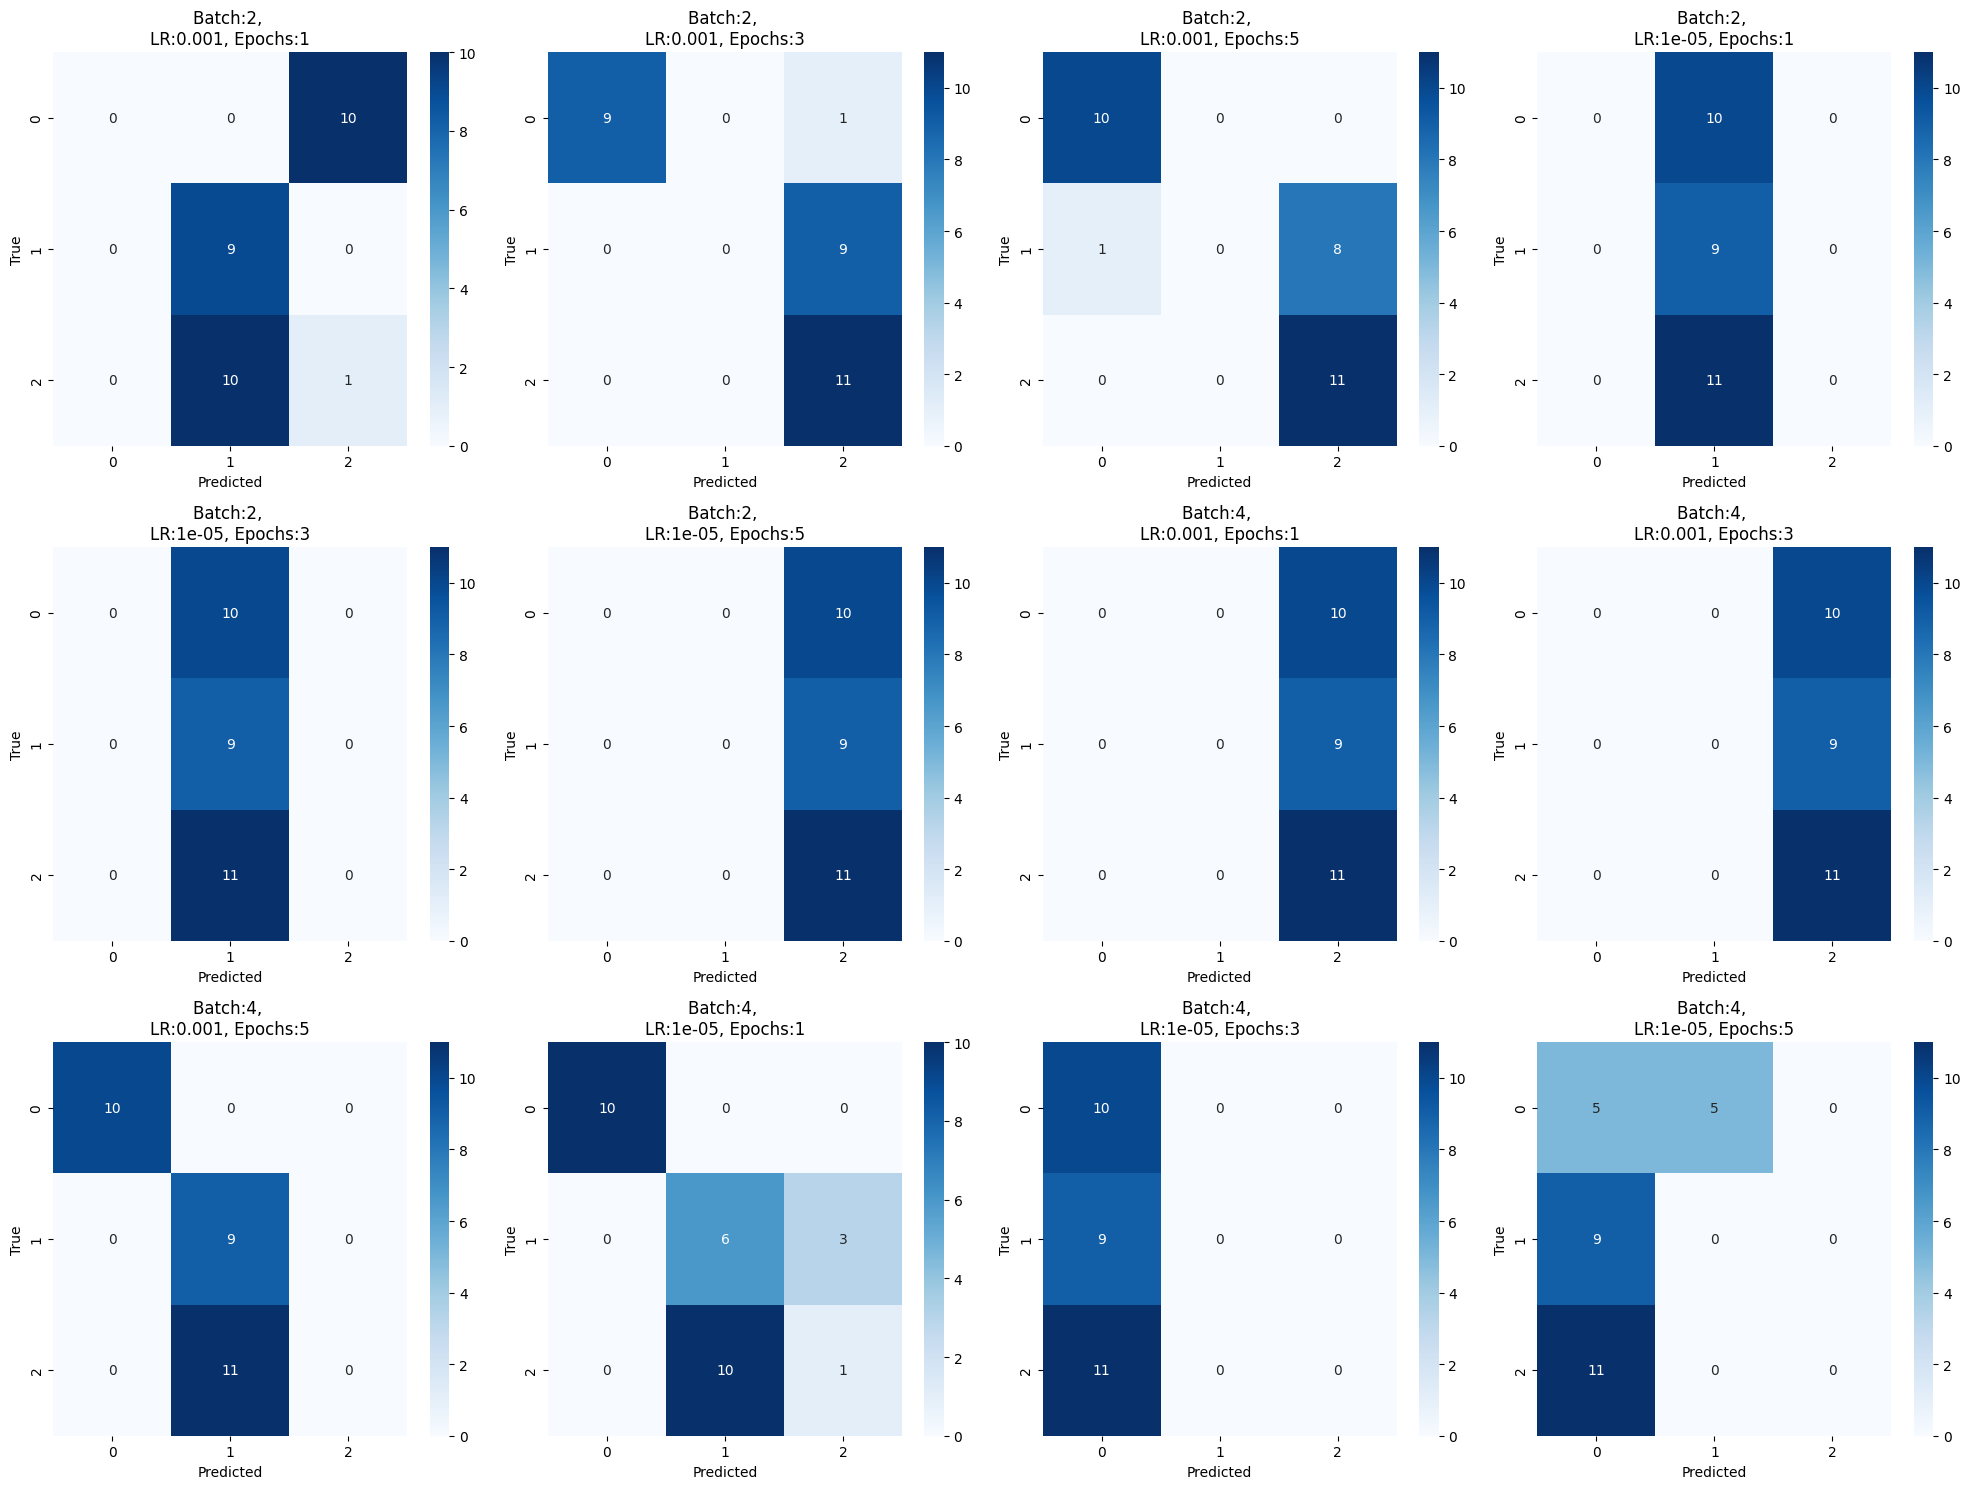

In [31]:
# Plotting confusion matrix for all configurations
plt.figure(figsize=(20, 15))
for i, result in enumerate(results):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns to accommodate all 12 configurations
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Batch:{result["batch_size"]}, \nLR:{result["learning_rate"]}, Epochs:{result["epochs"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()

plt.show()

In [32]:
best_result = max(results, key=lambda x: x['accuracy'])
print("\nBest configuration:")
print(f"Batch size: {best_result['batch_size']}")
print(f"Learning rate: {best_result['learning_rate']}")
print(f"Epochs: {best_result['epochs']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"F1 Score: {best_result['f1']:.4f}")


Best configuration:
Batch size: 2
Learning rate: 0.001
Epochs: 5
Accuracy: 0.7000
F1 Score: 0.5863


In [ ]:
%pip install autogluon

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import autogluon as ag



In [ ]:
from autogluon.tabular import TabularPredictor, TabularDataset
from autogluon.common import space
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
df = TabularDataset(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Custom hyperparameter search space
hyperparameters = {
    'NN_TORCH': {
        'optimizer': space.Categorical('adam', 'sgd'),
        'learning_rate': space.Real(1e-4, 0.1, log=True),  # 0.0001 to 0.1
        'batch_size': space.Categorical(16, 32, 64),  # Test different batch sizes
        'num_epochs': space.Int(50, 150)
    },
    'GBM': {
        'extra_trees': space.Categorical(True, False)
    }
}

# Configure random search
predictor = TabularPredictor(label='species').fit(
    train_data=df,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs={
        'num_trials': 10,  # Number of random combinations to test
        'scheduler': 'local',
        'searcher': 'random'
    },
    time_limit=300  # 5 minutes for search
)

# View results
leaderboard = predictor.leaderboard(df)
print(leaderboard)


Fitted model: NeuralNetTorch/4514d_00000 ...
	0.8667	 = Validation score   (accuracy)
	4.22s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4514d_00001 ...
	1.0	 = Validation score   (accuracy)
	4.5s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4514d_00002 ...
	1.0	 = Validation score   (accuracy)
	4.91s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4514d_00003 ...
	1.0	 = Validation score   (accuracy)
	5.48s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4514d_00004 ...
	0.5	 = Validation score   (accuracy)
	4.07s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/4514d_00005 ...
	1.0	 = Validation score   (accuracy)
	4.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/4514d_00006 ...
	1.0	 = Validation score   (accuracy)
	4.38s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model

                         model  score_test  score_val eval_metric  \
0                  LightGBM/T3    1.000000   1.000000    accuracy   
1   NeuralNetTorch/4514d_00006    0.993333   1.000000    accuracy   
2   NeuralNetTorch/4514d_00005    0.993333   1.000000    accuracy   
3                  LightGBM/T6    0.993333   1.000000    accuracy   
4   NeuralNetTorch/4514d_00007    0.986667   1.000000    accuracy   
5   NeuralNetTorch/4514d_00003    0.986667   1.000000    accuracy   
6   NeuralNetTorch/4514d_00001    0.980000   1.000000    accuracy   
7   NeuralNetTorch/4514d_00009    0.980000   1.000000    accuracy   
8                  LightGBM/T8    0.966667   0.966667    accuracy   
9   NeuralNetTorch/4514d_00002    0.966667   1.000000    accuracy   
10                 LightGBM/T5    0.960000   0.966667    accuracy   
11  NeuralNetTorch/4514d_00008    0.946667   1.000000    accuracy   
12                 LightGBM/T2    0.940000   1.000000    accuracy   
13                 LightGBM/T4    

In [ ]:
import autogluon.core as ag
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# 1. Data Preparation with Validation
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Simplified split for debugging
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)

# 2. Essential Hyperparameter Configuration
hyperparameters = {
    'NN_TORCH': {
        'num_epochs': 5,
        'learning_rate': 0.001,
        'batch_size': 4,
        'num_layers': 2,  # Number of HIDDEN layers
        'hidden_size': 16,  # Neurons per hidden layer
        'activation': 'relu',
        'optimizer': 'adam'
    }
}

predictor = TabularPredictor(
    label='target',
    problem_type='multiclass'
).fit(
    train_data=train_data,
    hyperparameters=hyperparameters,
    verbosity=4,
    time_limit=300
)

# 3. Minimal Predictor Configuration

# 4. Validation
y_pred = predictor.predict(test_data)
print(f"Accuracy: {accuracy_score(test_data['target'], y_pred)}")


No path specified. Models will be saved in: "AutogluonModels/ag-20250225_094135"
Verbosity: 4 (Maximum Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.3
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:23:36 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8112
CPU Count:          8
GPU Count:          0
Memory Avail:       1.33 GB / 8.00 GB (16.6%)
Disk Space Avail:   88.84 GB / 228.27 GB (38.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         :

Accuracy: 0.7


In [90]:
import autogluon.common as ag
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Iris dataset with proper one-hot encoding
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Split with stratification (70% train, 20% test, 10% holdout for bagging)
train_test, holdout = train_test_split(data, test_size=0.1, stratify=data['target'], random_state=42)
train, test = train_test_split(train_test, test_size=0.2/0.9, stratify=train_test['target'], random_state=42)

# Convert to AutoGluon datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)
holdout_data = TabularDataset(holdout)

# Configure neural network search space
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Int(1, 5),
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),
        'batch_size': ag.space.Categorical(2, 4),
        # 'layers': ag.space.Categorical([[4, 16, 3]]),
        'num_layers': 2,  # Number of HIDDEN layers
        'hidden_size': 16,  # Neurons per hidden layer
        'activation': 'relu'
    }
}

# Initialize predictor with bagged mode configuration
predictor = TabularPredictor(
    label='target',
    problem_type='multiclass',
    eval_metric='accuracy'
).fit(
    train_data=train_data,
    tuning_data=holdout_data,  # Required for use_bag_holdout
    hyperparameters=nn_hyperparameters,
    num_bag_folds=5,  # Enable bagging
    num_stack_levels=0,  # Disable stacking
    use_bag_holdout=True,  # Critical parameter
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'random'
    },
    # presets='best_quality',
    time_limit=600
)

# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# View search results
leaderboard = predictor.leaderboard(test_data)
print(leaderboard[['model', 'score_test', 'fit_time']])


Fitted model: NeuralNetTorch_BAG_L1/2b113_00000 ...
	0.6827	 = Validation score   (accuracy)
	4.39s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/2b113_00001 ...
	0.8269	 = Validation score   (accuracy)
	3.16s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/2b113_00002 ...
	0.6538	 = Validation score   (accuracy)
	3.43s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/2b113_00003 ...
	0.6827	 = Validation score   (accuracy)
	3.34s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/2b113_00004 ...
	0.75	 = Validation score   (accuracy)
	3.22s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/2b113_00005 ...
	0.8269	 = Validation score   (accuracy)
	3.43s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/2b113_00006 ...
	0.6442	 = Validation score   (accuracy)
	4.

Test Accuracy: 0.8710
Test F1: 0.8667
                                model  score_test  fit_time
0   NeuralNetTorch_BAG_L1/2b113_00005    0.903226  3.431719
1   NeuralNetTorch_BAG_L1/2b113_00001    0.870968  3.163535
2                 WeightedEnsemble_L2    0.870968  3.191185
3   NeuralNetTorch_BAG_L1/2b113_00007    0.870968  2.904269
4   NeuralNetTorch_BAG_L1/2b113_00008    0.677419  3.108831
5   NeuralNetTorch_BAG_L1/2b113_00009    0.677419  2.940806
6   NeuralNetTorch_BAG_L1/2b113_00002    0.645161  3.426781
7   NeuralNetTorch_BAG_L1/2b113_00006    0.645161  4.226247
8   NeuralNetTorch_BAG_L1/2b113_00004    0.580645  3.223262
9   NeuralNetTorch_BAG_L1/2b113_00000    0.548387  4.392227
10  NeuralNetTorch_BAG_L1/2b113_00003    0.548387  3.335354


In [88]:
print(leaderboard)


                                model  score_test  score_val eval_metric  \
0   NeuralNetTorch_BAG_L1/02900_00005    0.870968   0.826923    accuracy   
1                 WeightedEnsemble_L2    0.870968   0.666667    accuracy   
2   NeuralNetTorch_BAG_L1/02900_00006    0.612903   0.759615    accuracy   
3   NeuralNetTorch_BAG_L1/02900_00001    0.580645   0.759615    accuracy   
4   NeuralNetTorch_BAG_L1/02900_00008    0.548387   0.653846    accuracy   
5   NeuralNetTorch_BAG_L1/02900_00000    0.548387   0.682692    accuracy   
6   NeuralNetTorch_BAG_L1/02900_00004    0.548387   0.528846    accuracy   
7   NeuralNetTorch_BAG_L1/02900_00003    0.516129   0.586538    accuracy   
8   NeuralNetTorch_BAG_L1/02900_00002    0.451613   0.567308    accuracy   
9   NeuralNetTorch_BAG_L1/02900_00007    0.322581   0.375000    accuracy   
10  NeuralNetTorch_BAG_L1/02900_00009    0.322581   0.375000    accuracy   

    pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  \
0         0.036

In [97]:
import autogluon.common as ag
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# # Load Iris dataset with proper one-hot encoding
# iris = load_iris()
# data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['target'] = iris.target

# Split with stratification (70% train, 20% test, 10% holdout for bagging)
train_test, holdout = train_test_split(data, test_size=0.1, stratify=data['target'], random_state=42)
train, test = train_test_split(train_test, test_size=0.2/0.9, stratify=train_test['target'], random_state=42)

# Convert to AutoGluon datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)
holdout_data = TabularDataset(holdout)

# Configure neural network search space
nn_hyperparameters = {
    'NN_TORCH': {
        'num_epochs': ag.space.Int(1, 5),
        'learning_rate': ag.space.Categorical(1e-3, 1e-5),
        'batch_size': ag.space.Categorical(2, 4),
        # 'layers': ag.space.Categorical([[4, 16, 3]]),
        'num_layers': 2,  # Number of HIDDEN layers
        'hidden_size': 16,  # Neurons per hidden layer
        'activation': 'relu'
    }
}

# Initialize predictor with bagged mode configuration
predictor = TabularPredictor(
    label='target',
    problem_type='multiclass',
    eval_metric='accuracy'
).fit(
    train_data=train_data,
    tuning_data=holdout_data,  # Required for use_bag_holdout
    hyperparameters=nn_hyperparameters,
    num_bag_folds=5,  # Enable bagging
    num_stack_levels=0,  # Disable stacking
    use_bag_holdout=True,  # Critical parameter
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'bayes'
    },
    # presets='best_quality',
    time_limit=600
)

# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# View search results
leaderboard = predictor.leaderboard(test_data)
print(leaderboard[['model', 'score_test', 'fit_time']])


Fitted model: NeuralNetTorch_BAG_L1/bf3dee19 ...
	0.6827	 = Validation score   (accuracy)
	4.42s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/977ecfaa ...
	0.8269	 = Validation score   (accuracy)
	3.52s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/a7e4756c ...
	0.6442	 = Validation score   (accuracy)
	3.01s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/5dbc25ee ...
	0.5288	 = Validation score   (accuracy)
	3.36s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/f0494127 ...
	0.3462	 = Validation score   (accuracy)
	3.79s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/8fc3d822 ...
	0.8077	 = Validation score   (accuracy)
	3.08s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/242df236 ...
	0.5673	 = Validation score   (accuracy)
	3.35s	 = Training   r

Test Accuracy: 0.9032
Test F1: 0.9014
                             model  score_test  fit_time
0   NeuralNetTorch_BAG_L1/977ecfaa    0.903226  3.515083
1              WeightedEnsemble_L2    0.903226  3.530315
2   NeuralNetTorch_BAG_L1/8fc3d822    0.806452  3.076918
3   NeuralNetTorch_BAG_L1/15767499    0.741935  3.090762
4   NeuralNetTorch_BAG_L1/a7e4756c    0.741935  3.011241
5   NeuralNetTorch_BAG_L1/c87f07a5    0.677419  3.359140
6   NeuralNetTorch_BAG_L1/242df236    0.645161  3.350372
7   NeuralNetTorch_BAG_L1/bf3dee19    0.548387  4.418221
8   NeuralNetTorch_BAG_L1/5dbc25ee    0.548387  3.361834
9   NeuralNetTorch_BAG_L1/bc66d3fd    0.322581  3.626473
10  NeuralNetTorch_BAG_L1/f0494127    0.161290  3.791903
